### Import libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
import sklearn as sk
import pandas as pd

## Step 1 : Import and cleaning
_______________________________________________________

#### 1.1 Import data (1/4)

In [2]:
data = pd.read_csv('../ML1/arbres_grenoble_epsg4326.csv')

In [3]:
data.head(5)

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,5259,ESP11324,AR11324,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175673908288694,5.749421158918044"
1,1478,ESP27796,AR27796,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175689031385716,5.749449836814956"
2,13139,ESP4323,AR4323,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Grenoble Alpes Métropole,NaN,de 10 m à 20 m,Libre,Métropole de Grenoble,NaN,Libre,"45.175403375194556,5.748482643586666"
3,24132,ESP7132,AR7132,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,NaN,"45.17542427590123,5.748557574259692"
4,23970,ESP15162,AR15162,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP625,...,NaN,NaN,Ville de Grenoble,NaN,Moins de 10 m,NaN,Ville de Grenoble,NaN,NaN,"45.17760812265083,5.749356960358159"


In [4]:
data.columns

Index(['elem_point_id', 'code', 'nom', 'genre', 'genre_desc', 'categorie',
       'categorie_desc', 'sous_categorie', 'sous_categorie_desc',
       'code_parent', 'code_parent_desc', 'adr_secteur', 'bien_reference',
       'genre_bota', 'espece', 'variete', 'stadededeveloppement', 'equipe',
       'remarques', 'anneedeplantation', 'raisondeplantation',
       'traitementchenilles', 'courrier', 'identifiantplu',
       'typeimplantationplu', 'intituleprotectionplu', 'anneeabattage',
       'essouchement', 'diametrearbre', 'causeabattage', 'collectivite',
       'stationmetro', 'hauteurarbre', 'portarbre', 'structure', 'forme',
       'typenature', 'geo_point_2d'],
      dtype='object')

In [5]:
#garder la variable initiale 'data' sans aucun changement
arbres_gre = data

#### 1.2 and 1.3. Delete rows with missing values in «année de plantation» and analyss of data structure (3/4)

In [6]:
arbres_gre.describe()

,elem_point_id,adr_secteur,equipe,anneedeplantation,courrier,identifiantplu,anneeabattage,essouchement,diametrearbre,causeabattage
count,31736.000000,31736.000000,0.0,30144.000000,0.0,600.000000,0.0,0.0,0.0,0.0
mean,20393.645544,3.826758,NaN,1990.018644,NaN,87.856667,NaN,NaN,NaN,NaN
std,12759.662993,1.718467,NaN,17.992314,NaN,60.657935,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1900.000000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,9656.750000,2.000000,NaN,1975.000000,NaN,67.000000,NaN,NaN,NaN,NaN
50%,19424.500000,4.000000,NaN,1987.000000,NaN,70.000000,NaN,NaN,NaN,NaN
75%,29254.250000,5.000000,NaN,2006.000000,NaN,70.000000,NaN,NaN,NaN,NaN
max,46807.000000,6.000000,NaN,2022.000000,NaN,358.000000,NaN,NaN,NaN,NaN


In [7]:
# identifying the existence of nan values or non numeric (.info())
arbres_gre['anneedeplantation'].unique()

array([1975., 2009., 1970.,   nan, 1995., 2022., 1993., 1988., 1980.,
       2005., 2006., 1978., 1965., 2007., 2010., 1982., 1950., 1955.,
       1981., 1971., 2001., 1990., 1977., 1960., 1944., 1991., 2012.,
       1992., 1986., 2004., 1924., 1999., 1998., 1979., 2003., 2002.,
       1987., 1996., 2000., 1994., 2011., 1984., 1983., 1976., 1985.,
       1966., 1989., 1972., 2008., 1969., 1968., 1997., 2013., 2016.,
       2018., 2015., 2017., 2019., 2020., 1967., 1973., 1974., 2021.,
       2014., 1900., 1959., 1964.])

In [8]:
# Dropping nan values on the annedeplantation column
# dropping unnecessary columns (checked down when using describe)
arbres_gre = (arbres_gre.dropna(subset='anneedeplantation')
                        .drop(['code','elem_point_id','nom',
                 'genre','genre_desc', 'equipe', 'categorie',
                 'categorie_desc', 'traitementchenilles', 'sous_categorie', 'code_parent',
                 'remarques', 'identifiantplu','intituleprotectionplu',
                 'stationmetro', 'courrier', 'typeimplantationplu', 'bien_reference',
                 'anneeabattage', 'typeimplantationplu', 'sous_categorie_desc', 'code_parent_desc',
                 'essouchement', 'diametrearbre', 'causeabattage', 'forme'], axis=1)
)

In [9]:
arbres_gre.adr_secteur
#Bonjour Carlosse

0        5
1        5
2        5
3        5
4        5
        ..
31731    6
31732    6
31733    6
31734    6
31735    6
Name: adr_secteur, Length: 30144, dtype: int64

In [10]:
#checking if nans were dropped
arbres_gre['anneedeplantation'].unique()

array([1975., 2009., 1970., 1995., 2022., 1993., 1988., 1980., 2005.,
       2006., 1978., 1965., 2007., 2010., 1982., 1950., 1955., 1981.,
       1971., 2001., 1990., 1977., 1960., 1944., 1991., 2012., 1992.,
       1986., 2004., 1924., 1999., 1998., 1979., 2003., 2002., 1987.,
       1996., 2000., 1994., 2011., 1984., 1983., 1976., 1985., 1966.,
       1989., 1972., 2008., 1969., 1968., 1997., 2013., 2016., 2018.,
       2015., 2017., 2019., 2020., 1967., 1973., 1974., 2021., 2014.,
       1900., 1959., 1964.])

In [11]:
arbres_gre

,adr_secteur,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,geo_point_2d
0,5,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,"45.175673908288694,5.749421158918044"
1,5,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,"45.175689031385716,5.749449836814956"
2,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,"45.175403375194556,5.748482643586666"
3,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,"45.17542427590123,5.748557574259692"
4,5,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,"45.17760812265083,5.749356960358159"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,6,Betula,utilis,NaN,Arbre adulte,2011.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,"45.16662555881056,5.725420773879907"
31732,6,Pyrus,calleryana,Chanticleer,Arbre jeune,2004.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,"45.166507843931036,5.724994100759832"
31733,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,"45.164310298174165,5.72386645777105"
31734,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,"45.160543156799626,5.723835565766619"


In [12]:
#checking number of years
arbres_gre['anneedeplantation'].value_counts()

anneedeplantation
1975.0    3481
2001.0    1473
1980.0    1397
1970.0    1340
2015.0     998
          ... 
1944.0      26
1959.0      16
1924.0      11
1964.0       6
2021.0       4
Name: count, Length: 66, dtype: int64

In [13]:
arbres_gre[['longitude', 'latitude']] = arbres_gre['geo_point_2d'].str.split(",", expand = True)
arbres_gre[['longitude', 'latitude']] = arbres_gre[['longitude', 'latitude']].apply(pd.to_numeric)

In [14]:
arbres_gre = arbres_gre.drop(['geo_point_2d'], axis = 1)

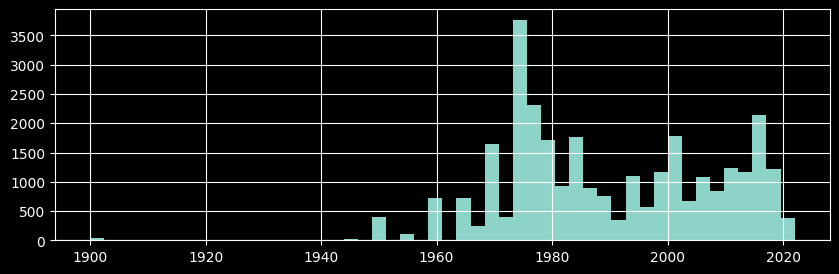

In [15]:
arbres_gre.anneedeplantation.hist(bins=50, figsize=(10,3))
plt.show()

In [16]:
#Version 1 

# arbres_gre_2 = arbres_gre.copy()
# list_col = ['genre_bota', 'espece', 'variete']genre_bota', 'espece', 'variete'

# for col in list_col:

#     compte = arbres_gre_2[col].value_counts()
#     n = 5
#     list_cat_unique = []
#     for cat in compte.index:
#         if compte[cat] <= n:
#             list_cat_unique.append(cat)
#     # apply applique la fonction a chaque element de ma serie 

#     arbres_gre_2[col] = arbres_gre_2[col].apply(lambda x: "other" if x in list_cat_unique else x)
# arbres_gre_2

In [17]:
arbres_gre

,adr_secteur,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,longitude,latitude
0,5,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175674,5.749421
1,5,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175689,5.749450
2,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.175403,5.748483
3,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.175424,5.748558
4,5,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,45.177608,5.749357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,6,Betula,utilis,NaN,Arbre adulte,2011.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.166626,5.725421
31732,6,Pyrus,calleryana,Chanticleer,Arbre jeune,2004.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.166508,5.724994
31733,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.164310,5.723866
31734,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.160543,5.723836


In [18]:
# Version 2 (update)
arbres_gre_2 = arbres_gre.copy()
list_col = ['genre_bota', 'espece', 'variete']

for col in list_col:

    compte = arbres_gre_2[col].value_counts()
    n = 5
    list_cat_unique = [cat for cat in compte.index if compte[cat] <= n]

    # apply applique la fonction a chaque element de ma serie 

    arbres_gre_2[col] = arbres_gre_2[col].apply(lambda x: "other" if x in list_cat_unique else x)
arbres_gre_2

,adr_secteur,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,longitude,latitude
0,5,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175674,5.749421
1,5,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175689,5.749450
2,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.175403,5.748483
3,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.175424,5.748558
4,5,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,45.177608,5.749357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,6,Betula,utilis,NaN,Arbre adulte,2011.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.166626,5.725421
31732,6,Pyrus,calleryana,Chanticleer,Arbre jeune,2004.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.166508,5.724994
31733,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.164310,5.723866
31734,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.160543,5.723836


In [19]:
len(arbres_gre_2.espece.value_counts()), len(arbres_gre.espece.value_counts()), 

(190, 274)

In [20]:
len(arbres_gre_2.genre_bota.value_counts()), len(arbres_gre.genre_bota.value_counts()), 

(89, 115)

#### 1.4. Saving as pickle (4/4)

In [21]:
arbres_pk = arbres_gre_2.to_pickle("../ML1/arbres-grenoble.pkl")

## Step 2 : Preparing data and evaluating ML models
_________________________________________

In [22]:
arbres_pk = pd.read_pickle('../ML1/arbres-grenoble.pkl')
arbres_pk

,adr_secteur,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,longitude,latitude
0,5,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175674,5.749421
1,5,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175689,5.749450
2,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.175403,5.748483
3,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.175424,5.748558
4,5,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,45.177608,5.749357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,6,Betula,utilis,NaN,Arbre adulte,2011.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.166626,5.725421
31732,6,Pyrus,calleryana,Chanticleer,Arbre jeune,2004.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.166508,5.724994
31733,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.164310,5.723866
31734,6,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.160543,5.723836


In [23]:
arbres_pk.columns

Index(['adr_secteur', 'genre_bota', 'espece', 'variete',
       'stadededeveloppement', 'anneedeplantation', 'raisondeplantation',
       'collectivite', 'hauteurarbre', 'portarbre', 'structure', 'typenature',
       'longitude', 'latitude'],
      dtype='object')

##### 2.1 Visualisez l'ensemble de données d'arbres pour comprendre ce qu'il contient

In [24]:
arbres_pk.head(5)

,adr_secteur,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,longitude,latitude
0,5,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175674,5.749421
1,5,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175689,5.749450
2,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.175403,5.748483
3,5,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.175424,5.748558
4,5,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,45.177608,5.749357


In [25]:
arbres_pk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30144 entries, 0 to 31735
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adr_secteur           30144 non-null  int64  
 1   genre_bota            30118 non-null  object 
 2   espece                28753 non-null  object 
 3   variete               4578 non-null   object 
 4   stadededeveloppement  27860 non-null  object 
 5   anneedeplantation     30144 non-null  float64
 6   raisondeplantation    3287 non-null   object 
 7   collectivite          29948 non-null  object 
 8   hauteurarbre          19995 non-null  object 
 9   portarbre             13931 non-null  object 
 10  structure             29924 non-null  object 
 11  typenature            13931 non-null  object 
 12  longitude             30144 non-null  float64
 13  latitude              30144 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 3.4+ MB


In [26]:
arbres_pk.describe()

,adr_secteur,anneedeplantation,longitude,latitude
count,30144.000000,30144.000000,30144.000000,30144.000000
mean,3.828722,1990.018644,45.177280,5.727445
std,1.706830,17.992314,0.011999,0.012782
min,1.000000,1900.000000,45.151572,5.697915
25%,2.000000,1975.000000,45.166299,5.717668
50%,4.000000,1987.000000,45.175925,5.729491
75%,5.000000,2006.000000,45.187461,5.737417
max,6.000000,2022.000000,45.224825,5.798704


##### 2.2. Créer un modèle naïf à utiliser comme référence pour les performances

In [27]:
#Using a funciton that splits training and test (80/20 ratio)
# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [28]:
# from zlib import crc32

# def test_set_check(identifier, test_ratio):
#     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# def split_train_test_by_id(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

In [29]:
#Applying the ration 80/20 to split our data
#train_set, test_set = split_train_test (arbres_pk, 0.2)
#print(len(train_set))
#print(len(test_set))


In [30]:
# arbres_pk_id = arbres_pk.reset_index()
# train_set, test_set = split_train_test_by_id(arbres_pk_id, 0.2, "index")
# print(len(train_set))
# print(len(test_set))

In [31]:
from sklearn.model_selection import train_test_split

X = arbres_pk.drop(['anneedeplantation'], axis=1)
y = arbres_pk['anneedeplantation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
y_pred_naiv = np.zeros_like(y_test) + y_train.median()
y_pred_naiv

array([1987., 1987., 1987., ..., 1987., 1987., 1987.])

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

msg = f"MODEL NAIF -- MEDIAN\nMSE = {mean_squared_error(y_test, y_pred_naiv):.1f}\nRMSE = {(mean_squared_error(y_test, y_pred_naiv))**0.5:.1f}\nMAE = {mean_absolute_error(y_test, y_pred_naiv):.1f}"
print(msg)


MODEL NAIF -- MEDIAN
MSE = 332.0
RMSE = 18.2
MAE = 15.5


In [34]:
# print(len(train_set))
# print(len(test_set))

##### 2.3. Pipeline scikit-learn pour le prétraitement des données 

In [35]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Stratify sur les features: StratifiedShuffleSplit

# train_set, test_set = train_test_split(arbres_pkl, test_size=0.2, random_state=42)
#>> Sort 2 outputs (dans ce dataset il y a la target dedans)

y = arbres_pk['anneedeplantation']
X = arbres_pk.drop('anneedeplantation', axis = 1)
# Sort 4 outputs (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(len(train_set))
# print(len(test_set))

In [36]:
from sklearn.compose import make_column_selector
# numerical_features = ['adr_secteur', 'longitude', 'latitude']
numerical_features = make_column_selector(dtype_include=np.number)

# categorical_features = ['bien_reference', 'genre_bota', 'espece', 'variete',
#                         'stadededeveloppement', 'raisondeplantation',
#                         'collectivite', 'hauteurarbre', 'portarbre', 
#                         'structure', 'typenature']
categorical_features = make_column_selector(dtype_exclude=np.number)

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import SGDClassifier

In [38]:
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

In [39]:
#Pipeline : Method 1
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                      (categorical_pipeline, categorical_features))

In [40]:
#Pipeline : Method 2
#full_pipeline = ColumnTransformer([("num", numerical_pipeline, numerical_features),
                                    # ("cat", categorical_pipeline, categorical_features)])

In [41]:
#Pipeline : Method 3
# cat_encoder = OneHotEncoder()
# arbres_pk_cat_1hot = cat_encoder.fit_transform(arbres_pk)
#1. arbres_pk_cat_1hot
#2. arbres_pk_cat_1hot.toarray()
#3. cat_encoder.categories_

In [42]:
#Fit toujours sur les données d'entrainement (jamais sur les données de test)

X_train_pipe = preprocessor.fit_transform(X_train)
X_train_pipe

<24115x386 sparse matrix of type '<class 'numpy.float64'>'
	with 313495 stored elements in Compressed Sparse Row format>

In [43]:
#X_test

In [44]:
#Transform toujours sur donnes de Test
#
X_test_pipe = preprocessor.transform(X_test)

In [45]:

model = make_pipeline(preprocessor, SGDClassifier(loss='log_loss'))
#model.fit(X, y)
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f607cfcc250>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6092a32750>)])),
                ('sgdclassifier', SGDClassifier(loss='log_loss'))])

##### 2.4 Évaluation des performances de trois modèles non réglés

##### 2.4.1 Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_pipe, y_train)

LinearRegression()

Text(0, 0.5, 'y_pred')

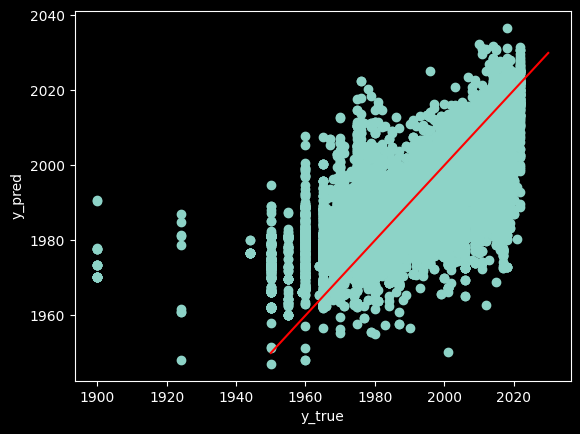

In [48]:
lin_reg.fit(X_train_pipe, y_train)
z = lin_reg.predict(X_train_pipe)
plt.scatter(y_train, z)
plt.plot([1950, 2030], [1950, 2030], 'r-')
plt.xlabel('y_true')
plt.ylabel('y_pred')


In [49]:
#example
some_data = arbres_pk.iloc[:7]
some_labels = y_train.iloc[:7]
some_data_prepared = preprocessor.transform(some_data)
some_data_pred = lin_reg.predict(some_data_prepared)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [1982.07008634 1983.33646332 1995.60287951 1991.21258909 2005.84280069
 1985.01859722 1982.62816932]
Labels: [2010.0, 1978.0, 1975.0, 1981.0, 1969.0, 2014.0, 1955.0]


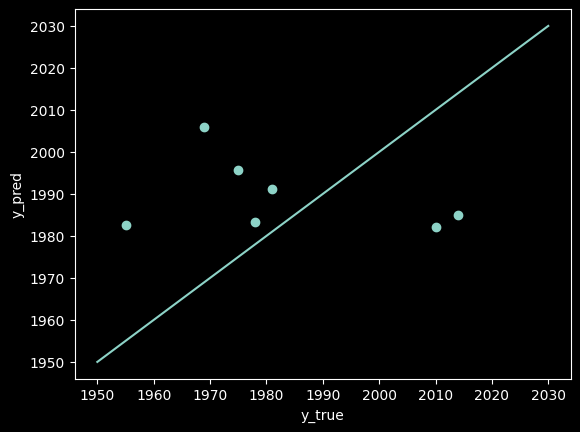

In [50]:
plt.figure()
plt.scatter(x = some_labels, y = some_data_pred)
plt.plot([1950, 2030], [1950, 2030], '-')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

tree_predictions = lin_reg.predict(X_test_pipe)
lin_mse = mean_squared_error(y_test, tree_predictions)
#** RMSE : squared=False // default: MSE
lin_rmse = np.sqrt(lin_mse)
lin_rmse, mean_absolute_error(y_test, tree_predictions)

(12.133278744185011, 9.151939952524808)

In [71]:
lin_scores = -cross_val_score(lin_reg, X_train_pipe, y_train,
                             scoring="neg_mean_squared_error", cv=10)
# lin_rmse_scores = np.sqrt(-lin_scores)
# display_scores(lin_rmse_scores)

In [72]:
pd.Series(lin_scores).describe()

count     10.000000
mean     149.180708
std        7.752525
min      134.251543
25%      144.936826
50%      148.496983
75%      155.657568
max      159.913940
dtype: float64

##### 2.4.2 DecisionTreeRegressor

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_pipe, y_train)

DecisionTreeRegressor()

In [53]:
tree_predictions = tree_reg.predict(X_test_pipe)
tree_rmse = mean_squared_error(y_test, tree_predictions, squared=False)
#tree_rmse = np.sqrt(tree_mse)
tree_rmse

7.835597180897601

In [69]:
from sklearn.model_selection import cross_val_score

tree_scores = -cross_val_score(tree_reg, X_train_pipe, y_train, 
                         scoring="neg_mean_squared_error", cv=10)

#tree_rmse_scores = np.sqrt(-scores)

In [70]:
pd.Series(tree_scores).describe()

count    10.000000
mean     71.989880
std       6.689221
min      64.578183
25%      67.702218
50%      69.711945
75%      75.043985
max      83.308872
dtype: float64

In [ ]:
# pdf
# def display_scores(scores):
#     print("Scores:", scores)
#     print("Mean:", scores.mean())
#     print("Standard deviation:", scores.std())

# display_scores(tree_rmse_scores)

##### 2.4.3 RandomForestRegressor

In [74]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_pipe, y_train)

RandomForestRegressor()

In [78]:
#X_train_pipe.shape

(24115, 386)

In [79]:
forest_scores = -cross_val_score(forest_reg, X_train_pipe, y_train, 
                         scoring="neg_mean_squared_error", cv=10, n_jobs=-1)

#verbose: 3 (Controls the verbosity: the higher, the more messages. Attention avec n_jobs)

In [80]:
pd.Series(forest_scores).describe()

count    10.000000
mean     46.602711
std       4.877229
min      41.850833
25%      42.719540
50%      44.353737
75%      50.932705
max      54.648198
dtype: float64

##### 2.5. Fine-Tuning the Model : Grid Search

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
                ("preprocessing", preprocessor), 
                ("random_forest", RandomForestRegressor(random_state=42)),
                ]) 
param_grid = [
    {'random_forest__n_estimators': [10,50,100],
     'random_forest__max_features': [4,6,8]},

]

grid_search = GridSearchCV(full_pipeline, param_grid, cv = 3, 
                           scoring='neg_root_mean_squared_error')

grid_search.fit(X_train, y_train)


/home/marcos.centurion@Digital-Grenoble.local/anaconda3/envs/stat3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/marcos.centurion@Digital-Grenoble.local/anaconda3/envs/stat3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/marcos.centurion@Digital-Grenoble.local/anaconda3/envs/stat3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/marcos.centurion@Digital-Grenoble.local/anaconda3/envs/stat3/lib/python3.11/site-packages/sklearn/metrics/_s

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f607cfcc250>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f6092a32750>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8],
                          'random_forest__n_estimators': [10, 50, 100]}],
             scoring='neg_root_mean_squared_error')

In [86]:
grid_search.best_params_

{'random_forest__max_features': 4, 'random_forest__n_estimators': 10}

In [92]:
#grid_search.cv_results_

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.504953,0.008258,0.048432,0.022342,4,10,"{'random_forest__max_features': 4, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
1,11.913552,0.035608,0.032951,0.005016,4,50,"{'random_forest__max_features': 4, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
2,23.681939,0.067300,0.032599,0.005432,4,100,"{'random_forest__max_features': 4, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
3,2.457010,0.022591,0.032701,0.005598,6,10,"{'random_forest__max_features': 6, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
4,11.775334,0.045214,0.032754,0.005218,6,50,"{'random_forest__max_features': 6, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
5,23.425398,0.057097,0.033102,0.005306,6,100,"{'random_forest__max_features': 6, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
6,2.453636,0.028206,0.032645,0.005488,8,10,"{'random_forest__max_features': 8, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
7,11.673228,0.068523,0.033185,0.005118,8,50,"{'random_forest__max_features': 8, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
8,23.241402,0.108254,0.033431,0.005496,8,100,"{'random_forest__max_features': 8, 'random_for...",NaN,NaN,NaN,NaN,NaN,1


In [91]:
cv_res.sort_values(by="mean_test_score", ascending=False)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.504953,0.008258,0.048432,0.022342,4,10,"{'random_forest__max_features': 4, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
1,11.913552,0.035608,0.032951,0.005016,4,50,"{'random_forest__max_features': 4, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
2,23.681939,0.067300,0.032599,0.005432,4,100,"{'random_forest__max_features': 4, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
3,2.457010,0.022591,0.032701,0.005598,6,10,"{'random_forest__max_features': 6, 'random_for...",NaN,NaN,NaN,NaN,NaN,1
4,11.775334,0.045214,0.032754,0.005218,6,50,"{'random_forest__max_features': 6, 'random_for...",NaN,NaN,NaN,NaN,NaN,1


In [94]:
forest_reg = RandomForestRegressor(max_features=4, n_estimators=10)
forest_reg.fit(X_train_pipe, y_train)

RandomForestRegressor(max_features=4, n_estimators=10)

In [97]:
forest_predictions = forest_reg.predict(X_test_pipe)
forest_rmse = mean_squared_error(y_test, forest_predictions, squared=False)
#tree_rmse = np.sqrt(tree_mse)
forest_rmse, mean_absolute_error(y_test, forest_predictions)

(6.924040873189651, 3.0972300547354434)

_________________

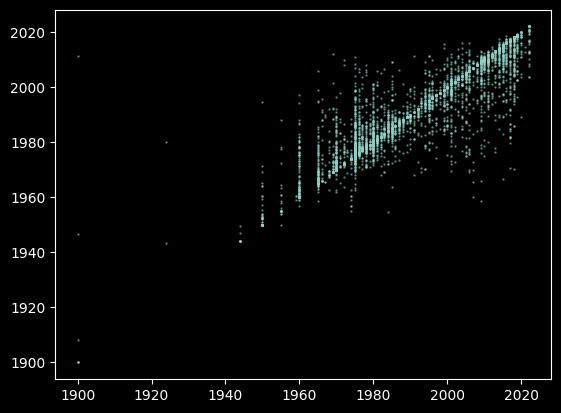

In [100]:
predictions = forest_reg.predict(X_test_pipe)
plt.scatter(y_test, predictions, s=0.5, alpha = 0.5)